In [1]:
# Importar librerías
from google.colab import files
import pandas as pd
import io  # Importar la biblioteca io
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import warnings

# Subir el archivo desde el sistema local
uploaded = files.upload()

# Leer el archivo desde el contenido subido
filename = list(uploaded.keys())[0]
data = pd.read_csv(io.StringIO(uploaded[filename].decode('utf-8')))

# Análisis descriptivo
info_descriptiva = data.info()
datos_perdidos = data.isnull().sum()

# Transformación de variables categóricas
categoricas = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
for col in categoricas:
    data[col] = LabelEncoder().fit_transform(data[col])

# Partición de datos
X = data.drop('y', axis=1)
y = data['y']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Ajuste de parámetros
warnings.filterwarnings("ignore", category=UserWarning)  # Ignorar advertencias de convergencia
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
predictions_logistic = logistic_model.predict(X_val)
conf_matrix_logistic = confusion_matrix(y_val, predictions_logistic)

# Aplicar Red Neuronal
neural_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
neural_model.fit(X_train, y_train)
predictions_neural = neural_model.predict(X_val)
conf_matrix_neural = confusion_matrix(y_val, predictions_neural)

# Seleccionar el mejor modelo
accuracy_logistic = accuracy_score(y_val, predictions_logistic)
accuracy_neural = accuracy_score(y_val, predictions_neural)

best_model = "Regresión Logística" if accuracy_logistic > accuracy_neural else "Red Neuronal"

# Desempeño final en conjunto de prueba
test_predictions = logistic_model.predict(X_test) if best_model == "Regresión Logística" else neural_model.predict(X_test)
final_conf_matrix = confusion_matrix(y_test, test_predictions)
accuracy_final = accuracy_score(y_test, test_predictions)

# Imprimir resultados
print("Matriz de confusión del mejor modelo en el conjunto de prueba:")
print(final_conf_matrix)
print("\nExactitud del mejor modelo en el conjunto de prueba:", accuracy_final)
print("\nMejor modelo:", best_model)


Saving bank_marketing_RETO_DS_AS.csv to bank_marketing_RETO_DS_AS.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        9000 non-null   int64 
 1   job        9000 non-null   object
 2   marital    9000 non-null   object
 3   education  9000 non-null   object
 4   default    9000 non-null   object
 5   balance    9000 non-null   int64 
 6   housing    9000 non-null   object
 7   loan       9000 non-null   object
 8   contact    9000 non-null   object
 9   day        9000 non-null   int64 
 10  month      9000 non-null   object
 11  duration   9000 non-null   int64 
 12  campaign   9000 non-null   int64 
 13  pdays      9000 non-null   int64 
 14  previous   9000 non-null   int64 
 15  poutcome   9000 non-null   object
 16  y          9000 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.2+ MB
Matriz de confusión del mejor m

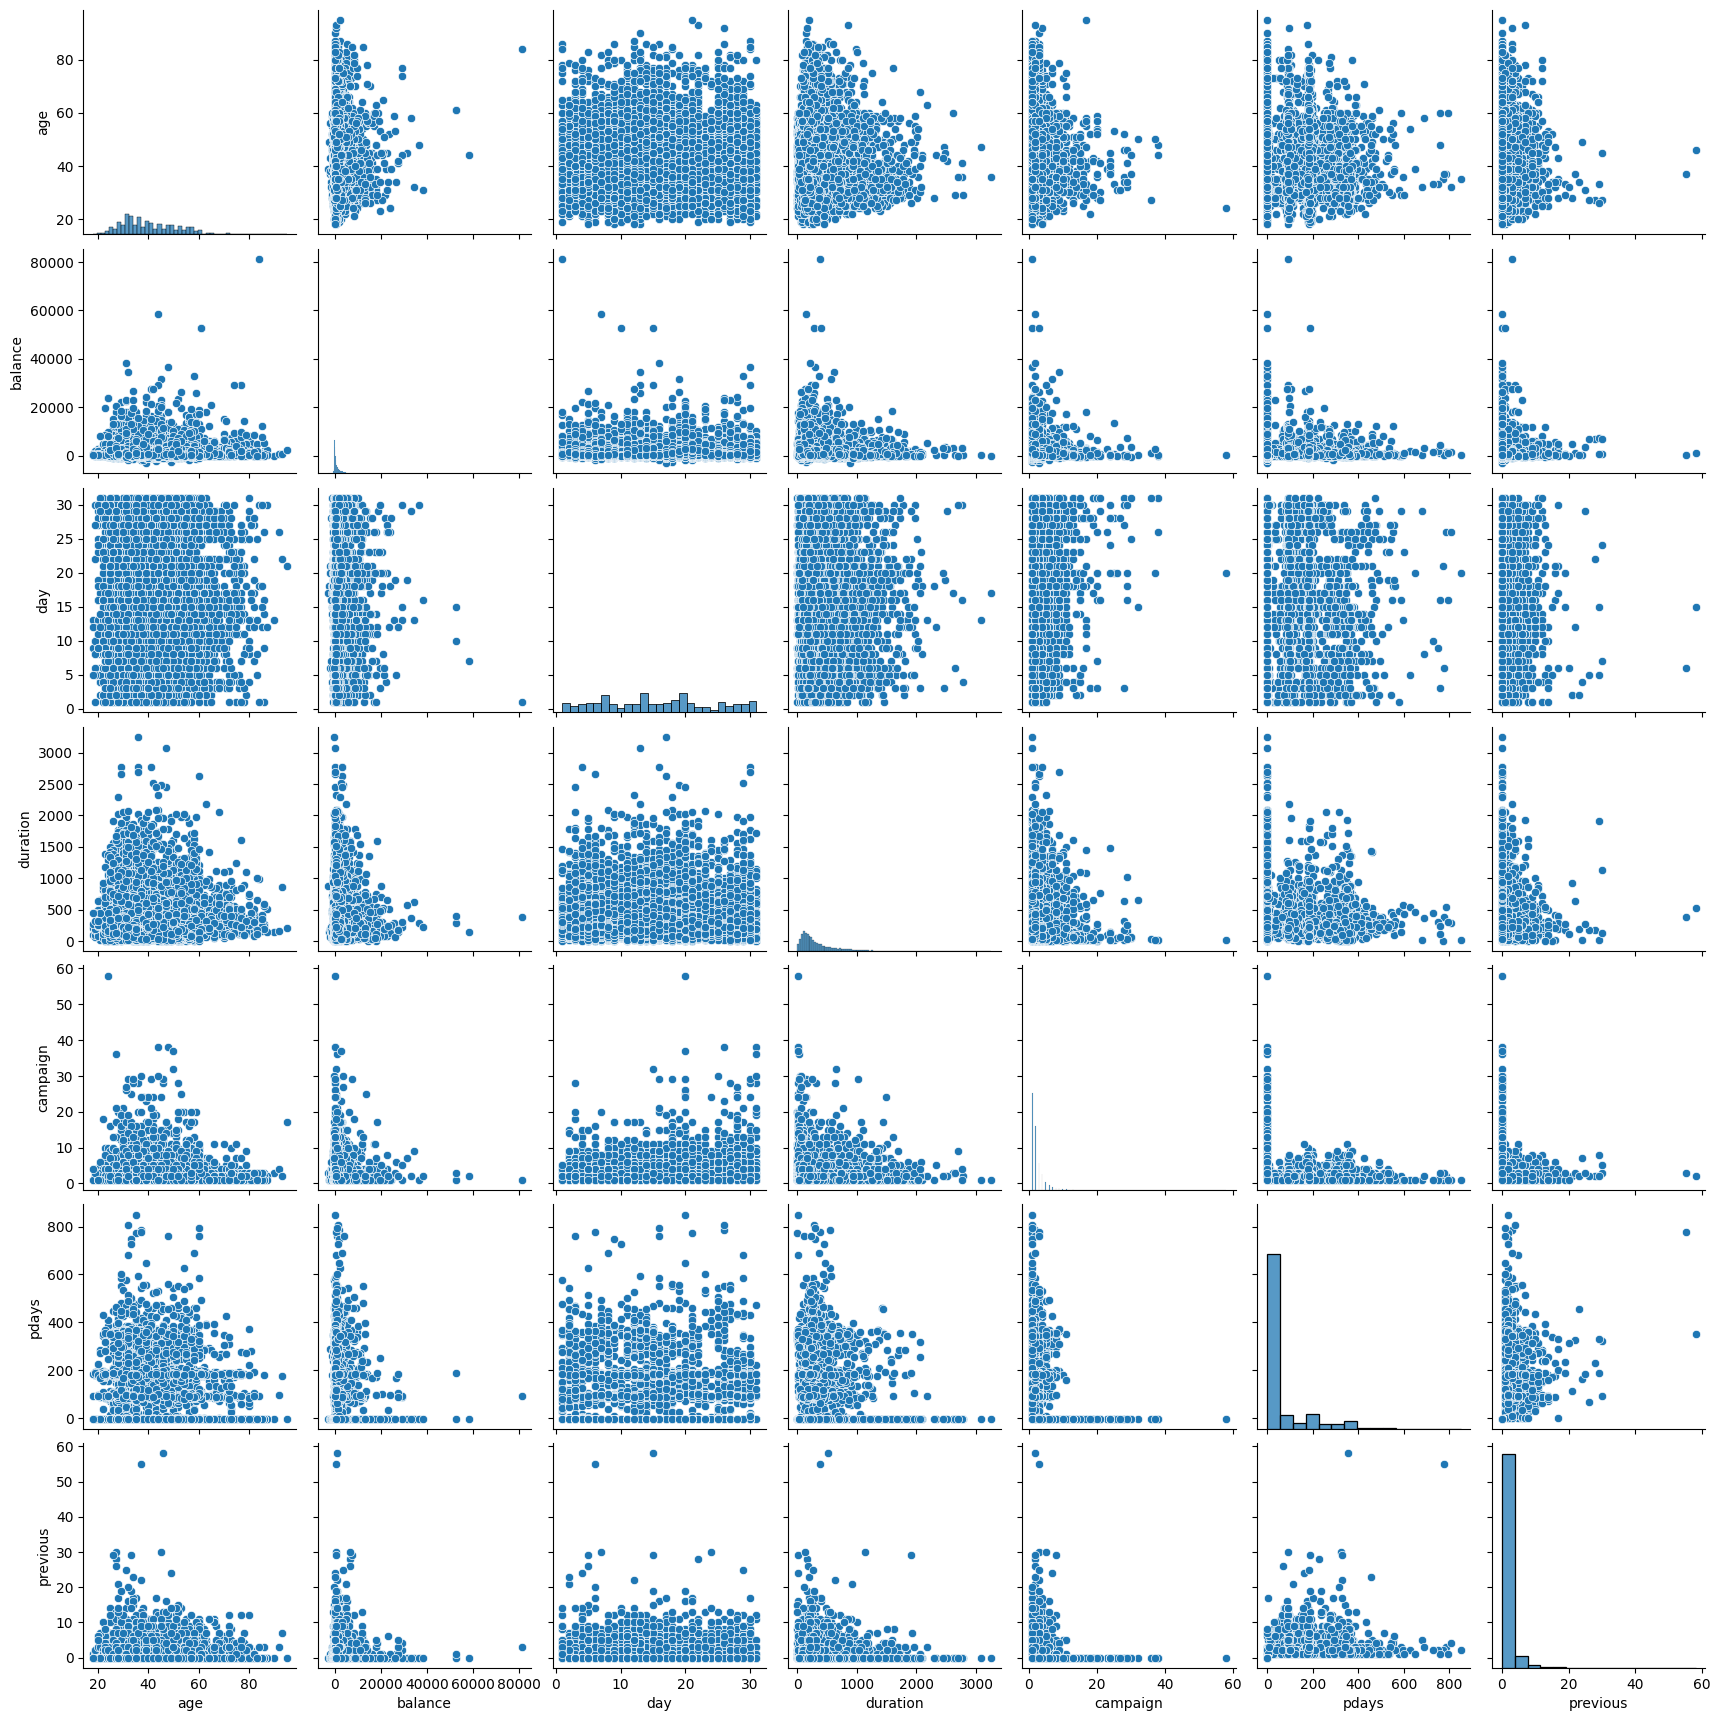

Matriz de confusión del mejor modelo en el conjunto de prueba:
[[842 163]
 [231 564]]

Exactitud del mejor modelo en el conjunto de prueba: 0.7811111111111111

Mejor modelo: Regresión Logística

Diferencia de desempeño entre modelos: 0.02444444444444438


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Análisis gráfico de variables numéricas
variables_numericas = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
sns.pairplot(data[variables_numericas])
plt.show()

# Documentación de la diferencia de desempeños de cada modelo
diferencia_desempeno = abs(accuracy_logistic - accuracy_neural)

# Imprimir resultados
print("Matriz de confusión del mejor modelo en el conjunto de prueba:")
print(final_conf_matrix)
print("\nExactitud del mejor modelo en el conjunto de prueba:", accuracy_final)
print("\nMejor modelo:", best_model)
print("\nDiferencia de desempeño entre modelos:", diferencia_desempeno)
